In [1]:
import metis
import torch 
import numpy as np 
from typing import List, Tuple, Union, Dict
import matplotlib.pyplot as plt 

from metis.featurepipeline import (
    Std, 
    Clip, 
    ClipQuantiles, 
    ElementwiseOp, 
    ToQuantile, 
    Identity, 
    FeaturePipeline
)

dir(metis)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_metis_ext',
 'add',
 'divide',
 'featurepipeline',
 'greet',
 'metis',
 'multiply',
 'subtract',
 'utils']

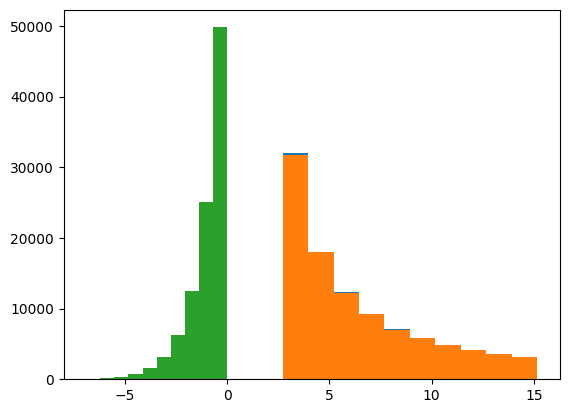

/home/nlyu/Code/midas/metis/python/metis/featurepipeline/pipeline.py:56: UserWarning: Features matched by 'exp.*' are not contiguous: ['exp', 'exp2']
  warnings.warn(f"Features matched by '{regex_str}' are not contiguous: {[self.feature_names[i] for i in indices]}")
/home/nlyu/Code/midas/metis/python/metis/featurepipeline/pipeline.py:51: UserWarning: Regex '.*' matches 2 already-matched features: {'exp2', 'exp'}
  warnings.warn(f"Regex '{regex_str}' matches {len(duplicates)} already-matched features: {duplicates}")


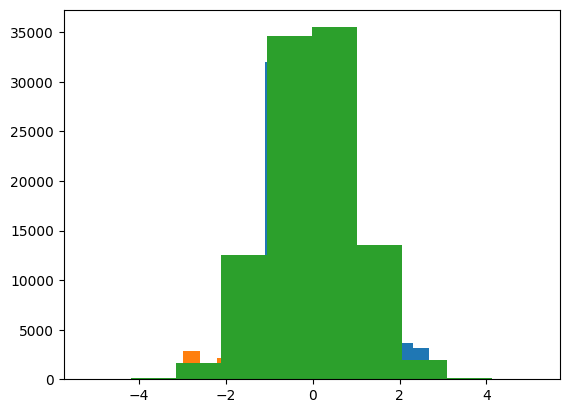

In [ ]:
data = torch.rand((100000, 3))
data[:, 0].exp_().exp_()
data[:, 1].exp_().exp_()
data[:, 2] = (1e-3 + data[:, 2]).log()
plt.hist(data[:, 0])
plt.hist(data[:, 1])
plt.hist(data[:, 2])
plt.show()
feature_names = ['exp', 'nlog', 'exp2']

fop = {
    'exp.*': [Std(), Clip(-3, 3)], 
    '.*': [Std(), Clip(-3, 3), ToQuantile(method='gaussian')],
}

fp = FeaturePipeline(fop, feature_names, feature_pack_pattern='batch *')
transformed_data = fp.fit(data)
plt.hist(transformed_data[:, 0].reshape)
plt.hist(transformed_data[:, 1])
plt.hist(transformed_data[:, 2])
plt.show()

In [ ]:

fop = {
    'exp': [Std(rearrange_shape='1 b', input_shape='b'), Clip(-3, 3, input_shape='b'), ToQuantile(rearrange_shape='1 b', input_shape='b')], 
    'nlog': [Std(rearrange_shape='1 b', input_shape='b'), Clip(-3, 3, input_shape='b'), ToQuantile(rearrange_shape='1 b', input_shape='b', method='gaussian')],
}

fp = FeaturePipeline(fop, feature_names, packed_shapes=[[], []], unpack_pattern='* s')

datap = fp.fit(data)
print(datap.shape)

Fitting Std(), feature exp
Fitting Clip(), feature exp
Fitting ToQuantile(), feature exp
Fitting Std(), feature nlog
Fitting Clip(), feature nlog
Fitting ToQuantile(), feature nlog
torch.Size([2, 100000])


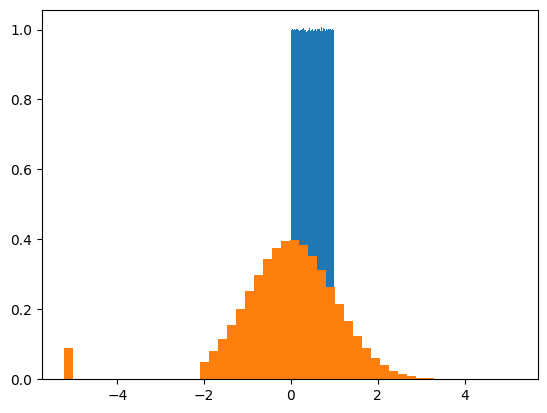

In [20]:
import matplotlib.pyplot as plt 
plt.hist(datap[0], density=True, bins=50)
plt.hist(datap[1], density=True, bins=50)
plt.show()